In [3]:
#%%
%load_ext autoreload
%autoreload 2
import loader
import processor
import config
import controller
import models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
loader.valid_ss(input='./data/final_data_add.txt',output='./data/final_data_add_valid.txt')

This function is used to remove invalid SMILES...
Load 53700 records, remove 0 invalid smiles...
Remain 53700 records finally...
Completed!


In [5]:
import random
import torch
import os
import numpy as np
def fix_seed(seed):
    """
    Seed all necessary random number generators.
    """
    #if seed is None:
    #    seed = random.randint(1, 10000)
    torch.set_num_threads(1)  # Suggested for issues with deadlocks, etc.
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = True

In [6]:
fix_seed(1)

# 数据分割方式改变

In [8]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'Prism'

In [6]:
train, val, test=loader.split_drug(input='./data/final_data1_valid.txt', random_seed=1)

This function is used to convert two columns tabular format to complete adjacency matrix...
splitting dataset...


In [9]:
# for large file

In [9]:
#python training_data.py
import pandas as pd
train, val, test = loader.load_data('training_data.txt', frac=[0.7,0.1,0.2],random_seed=1)

This function is used to convert two columns tabular format to complete adjacency matrix...
splitting dataset...


# 根据1:2的比例等比例划分数据集

In [10]:
X_drugs_train, X_targets_train, X_structures_train, y_train=loader.df2var_bal_ss(train,weight=2, random_seed=10000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 104631 records,which contain 34877 postive records and 69754 negative records...
Completed!


In [11]:
X_drugs_val, X_targets_val,  X_structures_val, y_val=loader.df2var_bal_ss(val,weight=2, random_seed=20000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 20427 records,which contain 6809 postive records and 13618 negative records...
Completed!


In [12]:
X_drugs_test, X_targets_test, X_structures_test, y_test=loader.df2var_bal_ss(test,weight=2, random_seed=30000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 35598 records,which contain 11866 postive records and 23732 negative records...
Completed!


In [13]:
train = processor.encode_ss(X_drugs_train, X_targets_train, X_structures_train, y_train, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 104631 drug-target pairs
encoding drug...
unique drugs: 348
encoding protein...
unique target sequence: 9068
encoding structure...
unique structure sequence: 9331
splitting dataset...
Done.


In [14]:
train

,SMILES,Target Sequence,Target Structure,Label,drug_encoding,target_encoding,structure_encoding
0,CC(O)CC(C)(C)O,CAUACAAUCGCGUGGAUAUGGCACGCAAGUU,(((((..(.(((((.......(((((.(...,0,CC(O)CC(C)(C)O,"[C, A, U, A, C, A, A, U, C, G, C, G, U, G, G, ...","[(, (, (, (, (, ., ., (, ., (, (, (, (, (, ., ..."
1,C=CN1CC2C34CC(C3CC14)C21C2CCC([NH+]3C=CC=C3)C(...,GGCUAGCAAGGAACCCACUGCUUAAGCCUCA,((((((((((((((((((((((((.((((((,0,C=CN1CC2C34CC(C3CC14)C21C2CCC([NH+]3C=CC=C3)C(...,"[G, G, C, U, A, G, C, A, A, G, G, A, A, C, C, ...","[(, (, (, (, (, (, (, (, (, (, (, (, (, (, (, ..."
2,C=C(C)C(=C)C=CC12CC13C1CC=C(C=CC4=CC(=O)C=C5OC...,AAUACCUGCCUGUCACGCAGGGGGUCGCGGG,(((.(((((.......(((((.....(((((,0,C=C(C)C(=C)C=CC12CC13C1CC=C(C=CC4=CC(=O)C=C5OC...,"[A, A, U, A, C, C, U, G, C, C, U, G, U, C, A, ...","[(, (, (, ., (, (, (, (, (, ., ., ., ., ., ., ..."
3,NCCCCCC(=O)O,UUUUCCAGGCAAAUCCGGAAAAUCAAGGCUG,((((((.((.....((((((((((..((((.,0,NCCCCCC(=O)O,"[U, U, U, U, C, C, A, G, G, C, A, A, A, U, C, ...","[(, (, (, (, (, (, ., (, (, ., ., ., ., ., (, ..."
4,Clc1ccc(-c2cc(Sc3c(Cl)cccc3Cl)cn3cncc23)cc1,CAGAAAUGGUGCCAAUUCCUGCAGCGGAAAC,((....(((((((...(....(((((....(,1,Clc1ccc(-c2cc(Sc3c(Cl)cccc3Cl)cn3cncc23)cc1,"[C, A, G, A, A, A, U, G, G, U, G, C, C, A, A, ...","[(, (, ., ., ., ., (, (, (, (, (, (, (, ., ., ..."
...,...,...,...,...,...,...,...
104626,C=CCC1C=CC(=O)NCC=CC(C)=CC(O)CC(F)Cc2nc(co2)C(...,UCUCCCCGAAAGCUAUUUAGGUAGCGCCUCG,.((((((....(((((....(((((.(((((,0,C=CCC1C=CC(=O)NCC=CC(C)=CC(O)CC(F)Cc2nc(co2)C(...,"[U, C, U, C, C, C, C, G, A, A, A, G, C, U, A, ...","[., (, (, (, (, (, (, ., ., ., ., (, (, (, (, ..."
104627,O=C(CC=CN1C=CC2OC(c3ccccc3)c3ccccc3C2=C1)c1ccc...,GGCCCGCCCAAACUGCCCUGAAAAGGGCUGA,((((..........(((((....(((((...,0,O=C(CC=CN1C=CC2OC(c3ccccc3)c3ccccc3C2=C1)c1ccc...,"[G, G, C, C, C, G, C, C, C, A, A, A, C, U, G, ...","[(, (, (, (, ., ., ., ., ., ., ., ., ., ., (, ..."
104628,C=CC=C1c2oc3ccccc3c2C(=O)c2cc(I)c(OC=Cn3cccc3)...,CGGACACCCAAGGUGCUCACACCGGAGACGG,......(((.(((.(((..(((((....(((,1,C=CC=C1c2oc3ccccc3c2C(=O)c2cc(I)c(OC=Cn3cccc3)...,"[C, G, G, A, C, A, C, C, C, A, A, G, G, U, G, ...","[., ., ., ., ., ., (, (, (, ., (, (, (, ., (, ..."
104629,CN1CC2(CC3c4ccccc4C=Cc4cccc2c43)C1,AGUUACCACAGGGAUAACUGGCUUGUGGCAG,((((..((((((.......(..(.(.(((((,0,CN1CC2(CC3c4ccccc4C=Cc4cccc2c43)C1,"[A, G, U, U, A, C, C, A, C, A, G, G, G, A, U, ...","[(, (, (, (, ., ., (, (, (, (, (, (, ., ., ., ..."


In [15]:
val = processor.encode_ss(X_drugs_val, X_targets_val, X_structures_val, y_val, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 20427 drug-target pairs
encoding drug...
unique drugs: 50
encoding protein...
unique target sequence: 7692
encoding structure...
unique structure sequence: 7855
splitting dataset...
Done.


In [16]:
test = processor.encode_ss(X_drugs_test, X_targets_test, X_structures_test, y_test, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 35598 drug-target pairs
encoding drug...
unique drugs: 99
encoding protein...
unique target sequence: 8636
encoding structure...
unique structure sequence: 8837
splitting dataset...
Done.


In [25]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 256, 
                   train_epoch = 50, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   num_workers=0
                  )

In [26]:
model = controller.initialize(**param)

Pretrained model loaded


In [27]:
model

In [28]:
model_test = models.Prism_GIN_AttrMasking(**param)

Pretrained model loaded


In [29]:
print(model_test)

Prism_GIN_AttrMasking(
  (gnn): GIN(
    (dropout): Dropout(p=0.5, inplace=False)
    (node_embeddings): ModuleList(
      (0): Embedding(120, 300)
      (1): Embedding(3, 300)
    )
    (gnn_layers): ModuleList(
      (0): GINLayer(
        (mlp): Sequential(
          (0): Linear(in_features=300, out_features=600, bias=True)
          (1): ReLU()
          (2): Linear(in_features=600, out_features=300, bias=True)
        )
        (edge_embeddings): ModuleList(
          (0): Embedding(6, 300)
          (1): Embedding(3, 300)
        )
        (bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GINLayer(
        (mlp): Sequential(
          (0): Linear(in_features=300, out_features=600, bias=True)
          (1): ReLU()
          (2): Linear(in_features=600, out_features=300, bias=True)
        )
        (edge_embeddings): ModuleList(
          (0): Embedding(6, 300)
          (1): Embedding(3, 300)
        )
        (bn): BatchNor

In [ ]:
#20211223

In [ ]:
model.train(train, val, test)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69795. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.65402. Total time 0.02138 hours
Training at Epoch 1 iteration 200 with loss 0.61477. Total time 0.0425 hours
Training at Epoch 1 iteration 300 with loss 0.62890. Total time 0.06361 hours
Training at Epoch 1 iteration 400 with loss 0.60338. Total time 0.08472 hours
Validation at Epoch 1, AUROC: 0.67797 , AUPRC: 0.53514 , F1: 0.52238 , Cross-entropy Loss: 0.79497 , ***
Training at Epoch 2 iteration 0 with loss 0.58465. Total time 0.10222 hours
Training at Epoch 2 iteration 100 with loss 0.56111. Total time 0.12361 hours
Training at Epoch 2 iteration 200 with loss 0.55337. Total time 0.14472 hours
Training at Epoch 2 iteration 300 with loss 0.57375. Total time 0.16583 hours
Training at Epoch 2 iteration 400 with loss 0.54779. Total time 0.18694 hours
Validation at Epoch 2, AUROC: 0.70660 , AUPRC: 0.56890 , F

In [21]:
#fixed 20210819 shuffle run

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68782. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.62978. Total time 0.00555 hours
Training at Epoch 1 iteration 200 with loss 0.63874. Total time 0.01083 hours
Validation at Epoch 1, AUROC: 0.51842 , AUPRC: 0.35101 , F1: 0.0 , Cross-entropy Loss: 0.64068 , ***
Training at Epoch 2 iteration 0 with loss 0.66079. Total time 0.01333 hours
Training at Epoch 2 iteration 100 with loss 0.62386. Total time 0.01833 hours
Training at Epoch 2 iteration 200 with loss 0.64381. Total time 0.02361 hours
Validation at Epoch 2, AUROC: 0.52898 , AUPRC: 0.35372 , F1: 0.0 , Cross-entropy Loss: 0.63774 , ***
Training at Epoch 3 iteration 0 with loss 0.64444. Total time 0.02583 hours
Training at Epoch 3 iteration 100 with loss 0.60774. Total time 0.03111 hours
Training at Epoch 3 iteration 200 with loss 0.68503. Total time 0.03638 hours
Validation at Epoch 3, AUROC: 0.5276

Training at Epoch 25 iteration 200 with loss 0.55628. Total time 0.33277 hours
Validation at Epoch 25, AUROC: 0.61677 , AUPRC: 0.44461 , F1: 0.34141 , Cross-entropy Loss: 0.63653
Training at Epoch 26 iteration 0 with loss 0.48882. Total time 0.33555 hours
Training at Epoch 26 iteration 100 with loss 0.46888. Total time 0.34111 hours
Training at Epoch 26 iteration 200 with loss 0.54899. Total time 0.34694 hours
Validation at Epoch 26, AUROC: 0.67331 , AUPRC: 0.48689 , F1: 0.30833 , Cross-entropy Loss: 0.61934 , ***
Training at Epoch 27 iteration 0 with loss 0.60519. Total time 0.34944 hours
Training at Epoch 27 iteration 100 with loss 0.54907. Total time 0.35527 hours
Training at Epoch 27 iteration 200 with loss 0.61537. Total time 0.36083 hours
Validation at Epoch 27, AUROC: 0.63477 , AUPRC: 0.46993 , F1: 0.36504 , Cross-entropy Loss: 0.69547
Training at Epoch 28 iteration 0 with loss 0.38242. Total time 0.36361 hours
Training at Epoch 28 iteration 100 with loss 0.53675. Total time 0.3

Training at Epoch 50 iteration 0 with loss 0.45847. Total time 0.68666 hours
Training at Epoch 50 iteration 100 with loss 0.33824. Total time 0.6925 hours
Training at Epoch 50 iteration 200 with loss 0.40699. Total time 0.69861 hours
Validation at Epoch 50, AUROC: 0.73658 , AUPRC: 0.60089 , F1: 0.53642 , Cross-entropy Loss: 0.56606
Training at Epoch 51 iteration 0 with loss 0.48387. Total time 0.70138 hours
Training at Epoch 51 iteration 100 with loss 0.37349. Total time 0.7075 hours
Training at Epoch 51 iteration 200 with loss 0.53587. Total time 0.71361 hours
Validation at Epoch 51, AUROC: 0.72595 , AUPRC: 0.60510 , F1: 0.52956 , Cross-entropy Loss: 0.56917
Training at Epoch 52 iteration 0 with loss 0.41257. Total time 0.71611 hours
Training at Epoch 52 iteration 100 with loss 0.34352. Total time 0.72222 hours
Training at Epoch 52 iteration 200 with loss 0.43887. Total time 0.72805 hours
Validation at Epoch 52, AUROC: 0.72929 , AUPRC: 0.59858 , F1: 0.50553 , Cross-entropy Loss: 0.584

Training at Epoch 74 iteration 200 with loss 0.51978. Total time 1.06027 hours
Validation at Epoch 74, AUROC: 0.74788 , AUPRC: 0.60724 , F1: 0.48158 , Cross-entropy Loss: 0.56025
Training at Epoch 75 iteration 0 with loss 0.40684. Total time 1.06305 hours
Training at Epoch 75 iteration 100 with loss 0.43294. Total time 1.06916 hours
Training at Epoch 75 iteration 200 with loss 0.53221. Total time 1.07527 hours
Validation at Epoch 75, AUROC: 0.73749 , AUPRC: 0.60399 , F1: 0.48448 , Cross-entropy Loss: 0.61456
Training at Epoch 76 iteration 0 with loss 0.31860. Total time 1.07777 hours
Training at Epoch 76 iteration 100 with loss 0.34441. Total time 1.08416 hours
Training at Epoch 76 iteration 200 with loss 0.50049. Total time 1.09 hours
Validation at Epoch 76, AUROC: 0.75411 , AUPRC: 0.61559 , F1: 0.56368 , Cross-entropy Loss: 0.58893
Training at Epoch 77 iteration 0 with loss 0.47583. Total time 1.09277 hours
Training at Epoch 77 iteration 100 with loss 0.32500. Total time 1.09916 hour

Training at Epoch 99 iteration 100 with loss 0.36188. Total time 1.42083 hours
Training at Epoch 99 iteration 200 with loss 0.43816. Total time 1.42611 hours
Early stop at 99
--- Finished ---
--- Go for Testing ---
Testing at Epoch 77 , AUROC: 0.76125 , AUPRC: 0.60733 , F1: 0.54316 , Cross-entropy Loss: 0.60523
--- Training Finished ---


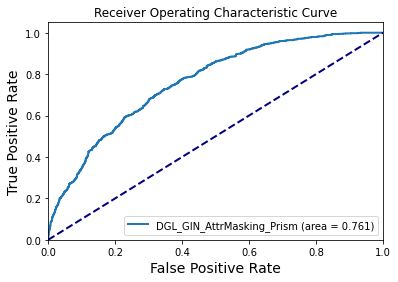

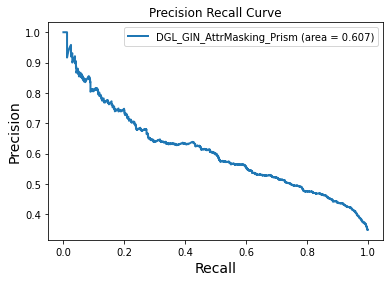

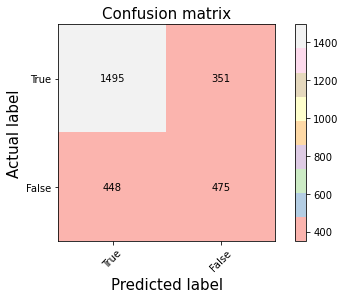

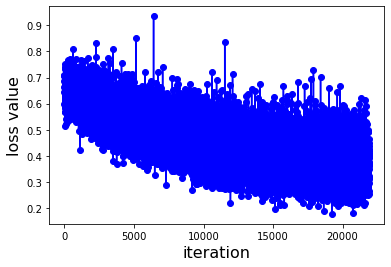

In [22]:
model.train(train, val, test)

In [ ]:
#fixed 20210819 shuffle test2

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69275. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.62738. Total time 0.005 hours
Training at Epoch 1 iteration 200 with loss 0.65761. Total time 0.01 hours
Validation at Epoch 1, AUROC: 0.48285 , AUPRC: 0.33382 , F1: 0.0 , Cross-entropy Loss: 0.64348 , ***
Training at Epoch 2 iteration 0 with loss 0.59113. Total time 0.01222 hours
Training at Epoch 2 iteration 100 with loss 0.59240. Total time 0.01722 hours
Training at Epoch 2 iteration 200 with loss 0.67326. Total time 0.0225 hours
Validation at Epoch 2, AUROC: 0.47997 , AUPRC: 0.32016 , F1: 0.0 , Cross-entropy Loss: 0.64682
Training at Epoch 3 iteration 0 with loss 0.64355. Total time 0.02472 hours
Training at Epoch 3 iteration 100 with loss 0.56680. Total time 0.02972 hours
Training at Epoch 3 iteration 200 with loss 0.60188. Total time 0.03472 hours
Validation at Epoch 3, AUROC: 0.50723 , AUPRC: 0

Training at Epoch 25 iteration 200 with loss 0.55032. Total time 0.30361 hours
Validation at Epoch 25, AUROC: 0.68047 , AUPRC: 0.55148 , F1: 0.40794 , Cross-entropy Loss: 0.61316
Training at Epoch 26 iteration 0 with loss 0.46557. Total time 0.30611 hours
Training at Epoch 26 iteration 100 with loss 0.53343. Total time 0.31111 hours
Training at Epoch 26 iteration 200 with loss 0.59602. Total time 0.31611 hours
Validation at Epoch 26, AUROC: 0.67486 , AUPRC: 0.53619 , F1: 0.37583 , Cross-entropy Loss: 0.59859
Training at Epoch 27 iteration 0 with loss 0.64006. Total time 0.31833 hours
Training at Epoch 27 iteration 100 with loss 0.57627. Total time 0.32333 hours
Training at Epoch 27 iteration 200 with loss 0.57739. Total time 0.32805 hours
Validation at Epoch 27, AUROC: 0.66593 , AUPRC: 0.55034 , F1: 0.41606 , Cross-entropy Loss: 0.58895
Training at Epoch 28 iteration 0 with loss 0.48315. Total time 0.33027 hours
Training at Epoch 28 iteration 100 with loss 0.62649. Total time 0.33555 h

Training at Epoch 50 iteration 100 with loss 0.49961. Total time 0.60583 hours
Training at Epoch 50 iteration 200 with loss 0.55463. Total time 0.61111 hours
Validation at Epoch 50, AUROC: 0.71340 , AUPRC: 0.57234 , F1: 0.41025 , Cross-entropy Loss: 0.59839 , ***
Training at Epoch 51 iteration 0 with loss 0.52344. Total time 0.61333 hours
Training at Epoch 51 iteration 100 with loss 0.58609. Total time 0.61805 hours
Training at Epoch 51 iteration 200 with loss 0.59726. Total time 0.62333 hours
Validation at Epoch 51, AUROC: 0.68454 , AUPRC: 0.55484 , F1: 0.41463 , Cross-entropy Loss: 0.62517
Training at Epoch 52 iteration 0 with loss 0.51773. Total time 0.62555 hours
Training at Epoch 52 iteration 100 with loss 0.45924. Total time 0.63055 hours
Training at Epoch 52 iteration 200 with loss 0.44569. Total time 0.63555 hours
Validation at Epoch 52, AUROC: 0.68712 , AUPRC: 0.54532 , F1: 0.39999 , Cross-entropy Loss: 0.64609
Training at Epoch 53 iteration 0 with loss 0.50982. Total time 0.6

Validation at Epoch 74, AUROC: 0.73467 , AUPRC: 0.59781 , F1: 0.38530 , Cross-entropy Loss: 0.62259 , ***
Training at Epoch 75 iteration 0 with loss 0.47569. Total time 0.90833 hours
Training at Epoch 75 iteration 100 with loss 0.42526. Total time 0.91333 hours
Training at Epoch 75 iteration 200 with loss 0.48807. Total time 0.91805 hours
Validation at Epoch 75, AUROC: 0.73868 , AUPRC: 0.59750 , F1: 0.49009 , Cross-entropy Loss: 0.59178 , ***
Training at Epoch 76 iteration 0 with loss 0.35009. Total time 0.92055 hours
Training at Epoch 76 iteration 100 with loss 0.41318. Total time 0.92527 hours
Training at Epoch 76 iteration 200 with loss 0.39033. Total time 0.93 hours
Validation at Epoch 76, AUROC: 0.71476 , AUPRC: 0.57162 , F1: 0.40983 , Cross-entropy Loss: 0.61944
Training at Epoch 77 iteration 0 with loss 0.46253. Total time 0.93222 hours
Training at Epoch 77 iteration 100 with loss 0.43938. Total time 0.93722 hours
Training at Epoch 77 iteration 200 with loss 0.52996. Total time 

Training at Epoch 99 iteration 100 with loss 0.48233. Total time 1.20472 hours
Training at Epoch 99 iteration 200 with loss 0.47052. Total time 1.20944 hours
Validation at Epoch 99, AUROC: 0.72674 , AUPRC: 0.58874 , F1: 0.49767 , Cross-entropy Loss: 0.61390
Training at Epoch 100 iteration 0 with loss 0.43516. Total time 1.21166 hours
Training at Epoch 100 iteration 100 with loss 0.51912. Total time 1.21666 hours
Training at Epoch 100 iteration 200 with loss 0.52329. Total time 1.22138 hours
Validation at Epoch 100, AUROC: 0.72693 , AUPRC: 0.59812 , F1: 0.50740 , Cross-entropy Loss: 0.62726
--- Finished ---
--- Go for Testing ---
Testing at Epoch 91 , AUROC: 0.74538 , AUPRC: 0.59795 , F1: 0.50220 , Cross-entropy Loss: 0.60664
--- Training Finished ---


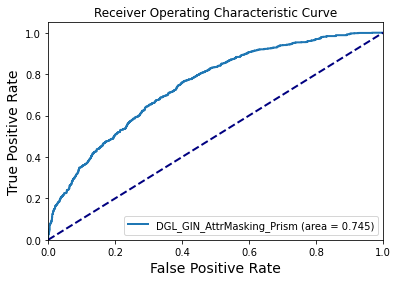

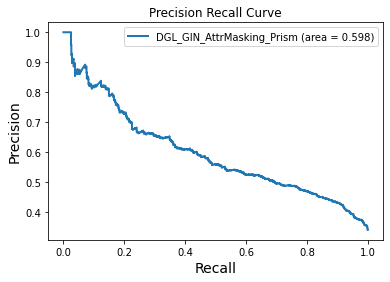

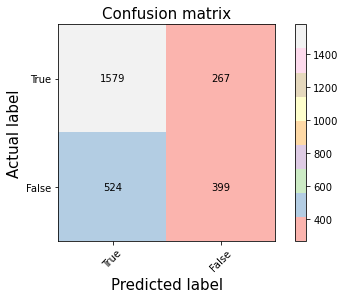

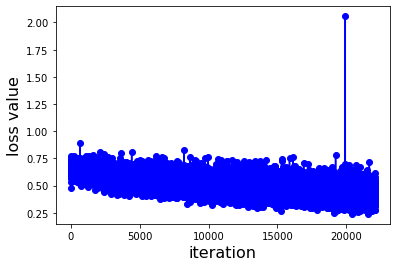

In [21]:
model.train(train, val, test)

In [ ]:
#new model for case study

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68782. Total time 0.00083 hours
Training at Epoch 1 iteration 100 with loss 0.62813. Total time 0.00611 hours
Training at Epoch 1 iteration 200 with loss 0.63884. Total time 0.01138 hours
Validation at Epoch 1, AUROC: 0.51129 , AUPRC: 0.34635 , F1: 0.0 , Cross-entropy Loss: 0.64076 , ***
Training at Epoch 2 iteration 0 with loss 0.65997. Total time 0.01388 hours
Training at Epoch 2 iteration 100 with loss 0.62654. Total time 0.01916 hours
Training at Epoch 2 iteration 200 with loss 0.64355. Total time 0.02416 hours
Validation at Epoch 2, AUROC: 0.52379 , AUPRC: 0.35176 , F1: 0.0 , Cross-entropy Loss: 0.63793 , ***
Training at Epoch 3 iteration 0 with loss 0.64557. Total time 0.02638 hours
Training at Epoch 3 iteration 100 with loss 0.60522. Total time 0.03166 hours
Training at Epoch 3 iteration 200 with loss 0.69251. Total time 0.03694 hours
Validation at Epoch 3, AUROC: 0.5403

Training at Epoch 25 iteration 200 with loss 0.53374. Total time 0.32972 hours
Validation at Epoch 25, AUROC: 0.58083 , AUPRC: 0.40994 , F1: 0.16646 , Cross-entropy Loss: 0.67274
Training at Epoch 26 iteration 0 with loss 0.48463. Total time 0.33222 hours
Training at Epoch 26 iteration 100 with loss 0.43948. Total time 0.3375 hours
Training at Epoch 26 iteration 200 with loss 0.58625. Total time 0.34277 hours
Validation at Epoch 26, AUROC: 0.63749 , AUPRC: 0.45180 , F1: 0.25253 , Cross-entropy Loss: 0.60834 , ***
Training at Epoch 27 iteration 0 with loss 0.48765. Total time 0.345 hours
Training at Epoch 27 iteration 100 with loss 0.63073. Total time 0.35027 hours
Training at Epoch 27 iteration 200 with loss 0.56704. Total time 0.35555 hours
Validation at Epoch 27, AUROC: 0.62871 , AUPRC: 0.43197 , F1: 0.34892 , Cross-entropy Loss: 0.63512
Training at Epoch 28 iteration 0 with loss 0.47545. Total time 0.35777 hours
Training at Epoch 28 iteration 100 with loss 0.54117. Total time 0.3630

Training at Epoch 50 iteration 100 with loss 0.29183. Total time 0.64305 hours
Training at Epoch 50 iteration 200 with loss 0.39736. Total time 0.64833 hours
Validation at Epoch 50, AUROC: 0.72071 , AUPRC: 0.57326 , F1: 0.48961 , Cross-entropy Loss: 0.57352
Training at Epoch 51 iteration 0 with loss 0.55133. Total time 0.65055 hours
Training at Epoch 51 iteration 100 with loss 0.39027. Total time 0.65583 hours
Training at Epoch 51 iteration 200 with loss 0.44809. Total time 0.66111 hours
Validation at Epoch 51, AUROC: 0.72687 , AUPRC: 0.56737 , F1: 0.53885 , Cross-entropy Loss: 0.58337
Training at Epoch 52 iteration 0 with loss 0.40337. Total time 0.66333 hours
Training at Epoch 52 iteration 100 with loss 0.37945. Total time 0.66861 hours
Training at Epoch 52 iteration 200 with loss 0.48678. Total time 0.67388 hours
Validation at Epoch 52, AUROC: 0.70631 , AUPRC: 0.54406 , F1: 0.43984 , Cross-entropy Loss: 0.60107
Training at Epoch 53 iteration 0 with loss 0.52280. Total time 0.67611 h

Training at Epoch 75 iteration 0 with loss 0.41297. Total time 0.95944 hours
Training at Epoch 75 iteration 100 with loss 0.39328. Total time 0.96444 hours
Training at Epoch 75 iteration 200 with loss 0.33879. Total time 0.96972 hours
Validation at Epoch 75, AUROC: 0.72030 , AUPRC: 0.54808 , F1: 0.38894 , Cross-entropy Loss: 0.63137
Training at Epoch 76 iteration 0 with loss 0.35344. Total time 0.97222 hours
Training at Epoch 76 iteration 100 with loss 0.41664. Total time 0.9775 hours
Training at Epoch 76 iteration 200 with loss 0.34177. Total time 0.98277 hours
Validation at Epoch 76, AUROC: 0.70318 , AUPRC: 0.52204 , F1: 0.30605 , Cross-entropy Loss: 0.66786
Training at Epoch 77 iteration 0 with loss 0.37890. Total time 0.98527 hours
Training at Epoch 77 iteration 100 with loss 0.40444. Total time 0.99055 hours
Training at Epoch 77 iteration 200 with loss 0.37172. Total time 0.99583 hours
Validation at Epoch 77, AUROC: 0.75128 , AUPRC: 0.59771 , F1: 0.49444 , Cross-entropy Loss: 0.61

Training at Epoch 99 iteration 200 with loss 0.40648. Total time 1.27805 hours
Validation at Epoch 99, AUROC: 0.73707 , AUPRC: 0.57946 , F1: 0.40245 , Cross-entropy Loss: 0.61164
Training at Epoch 100 iteration 0 with loss 0.39666. Total time 1.28027 hours
Training at Epoch 100 iteration 100 with loss 0.27555. Total time 1.28555 hours
Training at Epoch 100 iteration 200 with loss 0.28289. Total time 1.29111 hours
Validation at Epoch 100, AUROC: 0.72472 , AUPRC: 0.57647 , F1: 0.47112 , Cross-entropy Loss: 0.57813
--- Finished ---
--- Go for Testing ---
Testing at Epoch 87 , AUROC: 0.76709 , AUPRC: 0.61684 , F1: 0.53510 , Cross-entropy Loss: 0.61099
--- Training Finished ---


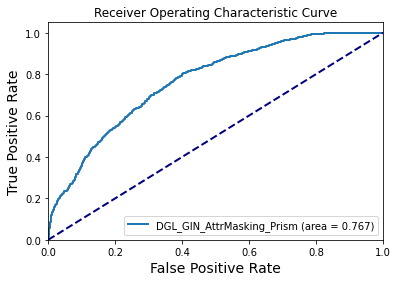

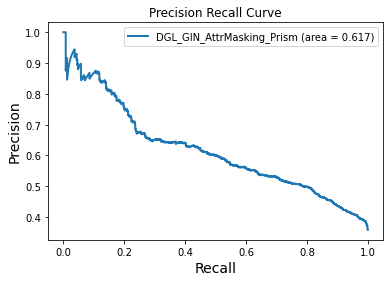

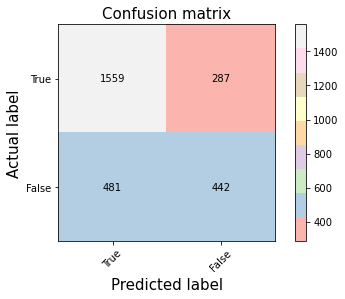

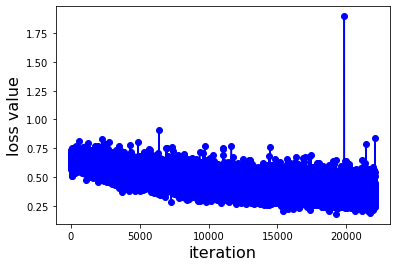

In [19]:
model.train(train, val, test)

In [ ]:
model.save_model('./Prism_GIN_drug_bal_model')

In [ ]:
#test

In [2]:
model = controller.model_pretrained(path_dir = './Prism_GIN_drug_bal_model')
model

Using backend: pytorch


Pretrained model loaded


In [3]:
t_name, t, t_ss= loader.predict_load_ss('./case_study/ESE2_target_ss.txt', 1)

In [13]:
d_name, d= loader.predict_load('./case_study/ESE2_drug.txt', 1)

In [14]:
y_pred = controller.classify_ss(X_repurpose = d, 
                             target = t, 
                             structure = t_ss,
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=10)

virtual screening...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
encoding structure...
unique structure sequence: 1
Done.
predicting...
---------------
+------+-----------+-------------+-------------+-------------+
| Rank | Drug Name | Target Name | Interaction | Probability |
+------+-----------+-------------+-------------+-------------+
|  1   |   SMN-C5  |     ESE2    |     YES     |     0.56    |
+------+-----------+-------------+-------------+-------------+

In [11]:
t_name, t, t_ss= loader.predict_load_ss('./case_study/ESE2_target_ss2.txt', 1)

In [12]:
d_name, d= loader.predict_load('./case_study/ESE2_drug.txt', 1)

In [13]:
y_pred = controller.classify_ss(X_repurpose = d, 
                             target = t, 
                             structure = t_ss,
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=10)

virtual screening...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
encoding structure...
unique structure sequence: 1
Done.
predicting...
---------------
+------+-----------+-------------+-------------+-------------+
| Rank | Drug Name | Target Name | Interaction | Probability |
+------+-----------+-------------+-------------+-------------+
|  1   |   SMN-C5  |    ESE2_2   |      NO     |     0.43    |
+------+-----------+-------------+-------------+-------------+

In [11]:
t_name, t, t_ss= loader.predict_load_ss('./case_study/mir21_target_ss.txt', 3)

In [12]:
d_name, d= loader.predict_load('./case_study/mir21_drug.txt', 4)

In [13]:
y_pred = controller.classify_ss(X_repurpose = d, 
                             target = t, 
                             structure = t_ss,
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=10)

virtual screening...
in total: 12 drug-target pairs
encoding drug...
unique drugs: 4
encoding protein...
unique target sequence: 3
encoding structure...
unique structure sequence: 3
Done.
predicting...
---------------
+------+-----------+-------------+-------------+-------------+
| Rank | Drug Name | Target Name | Interaction | Probability |
+------+-----------+-------------+-------------+-------------+
|  1   |     1a    |   miR21_sl  |      NO     |     0.25    |
|  2   |     3     |   miR21_sl  |      NO     |     0.23    |
|  3   |     2     |   miR21_sl  |      NO     |     0.23    |
|  4   |     1     |   miR21_sl  |      NO     |     0.20    |
|  5   |     3     |  miR21_hx2  |      NO     |     0.19    |
|  6   |     3     |  miR21_hx1  |      NO     |     0.14    |
|  7   |     1a    |  miR21_hx2  |      NO     |     0.08    |
|  8   |     2     |  miR21_hx2  |      NO     |     0.06    |
|  9   |     1     |  miR21_hx2  |      NO     |     0.05    |
|  10  |     1a    |  miR2

In [14]:
t_name, t, t_ss= loader.predict_load_ss('./case_study/disney_target_ss.txt', 2)

In [15]:
d_name, d= loader.predict_load('./case_study/disney_drug.txt', 5)

In [16]:
d_name,d

(array(['C1', 'C2', 'C3', 'C4', 'C5'], dtype='<U2'),
 array(['COc1ccc(Br)cc1C(=O)Nc4ccc(c3nc2ccccc2[nH]3)cc4\n',
        'COc1ccc(Br)cc1C(=O)NC(=S)Nc4cc(c3nc2ccccc2[nH]3)ccc4C\n',
        'O=C(NC(=S)Nc3cc(c2nc1ccccc1[nH]2)ccc3Cl)c5ccc4OCOc4c5\n',
        'O=C(NC(=S)Nc3cc(c2nc1ccccc1[nH]2)ccc3Cl)C4=CC=CSC4\n',
        'CNc2nc(Nc1cccc(C(=O)O)c1)nc3ccccc23'], dtype='<U54'))

In [17]:
y_pred = controller.classify_ss(X_repurpose = d, 
                             target = t, 
                             structure = t_ss,
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=80)

virtual screening...
in total: 5 drug-target pairs
encoding drug...
unique drugs: 5
encoding protein...
unique target sequence: 1
encoding structure...
unique structure sequence: 1
Done.
predicting...
---------------
+------+-----------+--------------+-------------+-------------+
| Rank | Drug Name | Target Name  | Interaction | Probability |
+------+-----------+--------------+-------------+-------------+
|  1   |     C5    | disney-SARS2 |     YES     |     0.51    |
|  2   |     C2    | disney-SARS2 |      NO     |     0.14    |
|  3   |     C3    | disney-SARS2 |      NO     |     0.11    |
|  4   |     C1    | disney-SARS2 |      NO     |     0.09    |
|  5   |     C4    | disney-SARS2 |      NO     |     0.06    |
+------+-----------+--------------+-------------+-------------+

In [150]:
t_name, t, t_ss= loader.predict_load_ss('./case_study/target_ss.txt',1)

In [153]:
t_name, t, t_ss= loader.predict_load_ss('./case_study/target2_ss.txt',1)

In [154]:
d_name, d= loader.predict_load('./case_study/drug.txt', 80)

In [155]:
y_pred = controller.classify_ss(X_repurpose = d, 
                             target = t, 
                             structure = t_ss,
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=80)

virtual screening...
in total: 78 drug-target pairs
encoding drug...
unique drugs: 77
encoding protein...
unique target sequence: 1
encoding structure...
unique structure sequence: 1
Done.
predicting...
---------------
+------+----------------------+-----------------+-------------+-------------+
| Rank |      Drug Name       |   Target Name   | Interaction | Probability |
+------+----------------------+-----------------+-------------+-------------+
|  1   |     Chloroquine      | Single-stranded |     YES     |     0.86    |
|  2   |  Hydroxychloroquine  | Single-stranded |     YES     |     0.84    |
|  3   |     Tromantadine     | Single-stranded |     YES     |     0.82    |
|  4   |      Pleconaril      | Single-stranded |     YES     |     0.76    |
|  5   |      Amantadine      | Single-stranded |     YES     |     0.76    |
|  6   |     Rimantadine      | Single-stranded |     YES     |     0.71    |
|  7   |     Rilpivirine      | Single-stranded |     YES     |     0.68    |
|

In [104]:
model

In [15]:
#%%
%load_ext autoreload
%autoreload 2
import os
import datautils
from smoothgrad import *
from param import param_num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
X_drugs, X_targets, X_structures, y = loader.file2var_ss(input = './case_study/ESE2_gra_test.txt')

This function is used to generate dataset from tabular file...
Completed!


In [17]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'Prism'

In [18]:
test = processor.encode_ss(X_drugs, X_targets, X_structures, y, drug_encoding, target_encoding, random_seed = 1)

Drug Target Interaction Prediction...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
encoding structure...
unique structure sequence: 1
splitting dataset...
Done.


In [19]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 5, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   gnn_hid_dim_drug = 64,
                   gnn_num_layers = 3,
                   gnn_activation = F.relu,
                   in_feats = 74
                  )

In [20]:
import dgl
param['batch_size']=1
def dgl_collate_func(x):
    d, p, y = zip(*x)
    d = dgl.batch(d)
    return d, torch.tensor(p), torch.tensor(y)

import torch
from torch.utils.data import SequentialSampler
from loader import *
params_test = {'batch_size': param['batch_size'],
               'shuffle': False,
               'num_workers': 0,
               'drop_last': False,
               'collate_fn': dgl_collate_func,
               'sampler': SequentialSampler(data_process_loader(test.index.values, test.Label.values, test, **param))}

test_loader = torch.utils.data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **param), **params_test)

In [21]:
import torch
device = torch.device("cuda")

In [22]:
model = models.Prism_GIN_AttrMasking(**param)

Pretrained model loaded


In [23]:
model_path = ("./Prism_GIN_drug_bal_model/model.pt")
filename = model_path.format("CNN_GIN")
print("Loading model: {}".format(filename))
model.load_state_dict(torch.load(filename, map_location='cpu'))
model = model.to(device)
#print(type(model))

Loading model: ./Prism_GIN_drug_bal_model/model.pt


In [24]:
from smoothgrad import *

batch_size=1

def compute_saliency(model, device, test_loader):

    model.eval()

    identity = "result"
    #saliency_dir = datautils.make_directory(".", "out/saliency")
    saliency_path = os.path.join("./out", identity+'.sal')

    # sgrad = SmoothGrad(model, device=device)
    sgrad = GuidedBackpropSmoothGrad(model, device=device)
    sal = ""
    #for batch_idx, (x0, y0) in enumerate(test_loader):
        #X, Y = x0.float().to(device), y0.to(device).float()
    #print(len(test))
    for batch_idx, (v_d, v_p, label) in enumerate(test_loader):
        X, Y, Z = v_d, v_p.float().to(device), label.to(device)
        #print(X.shape, Y.shape)
        #print(batch_idx)
        guided_saliency_p= sgrad.get_batch_gradients(X, Y, Z)
        # import pdb; pdb.set_trace()
        #print(guided_saliency_p.shape)
        #N, NS, _= guided_saliency_p.shape # (N, 31, 1, 4)
        N, NS, _,_= guided_saliency_p.shape # (N, 1, 31, 5)
        
        output = model(X, Y)
        prob = torch.sigmoid(output)
        p_np = prob.to(device='cpu').detach().numpy().squeeze()
        
        #print(N)
        str_sal=[] 
        for i in range(N):
            inr = batch_idx*batch_size + i
            str_sal = datautils.mat2str(np.squeeze(guided_saliency_p[i]))
            #print(p_np)
            #sal += "{}\t{:.6f}\t{}\n".format(inr, p_np, str_sal)
            str_sal
    return str_sal[:-1]
       
    #f = open(saliency_path,"w")
    #f.write(sal)
    #f.close()
    #print(saliency_path)

In [27]:
sal=compute_saliency(model, device, test_loader)

In [28]:
sal

'3.000,3.977,2.389,0.615,0.613,0.616,0.178,0.829,0.002,0.067,2.653,1.196,2.826,0.306,0.051,0.003,13.127,7.453,0.770,0.007,2.041,0.030,0.038,5.958,2.705,0.708,3.511,0.835,8.111,0.149,0.026,0.247,2.277,4.365,7.775,0.400,0.083,0.006,0.062,1.243,0.001,0.463,0.363,0.679,3.374,4.693,0.009,1.321,1.719,0.220,0.037,0.066,7.309,1.035,0.177,0.073,0.523,0.336,0.008,0.492,0.187,1.604,2.807,0.503,1.752,3.575,1.762,5.183,1.014,0.001,0.527,0.494,0.169,1.274,0.574,0.925,0.016,0.544,2.770,0.363,0.195,0.061,1.740,0.796,1.797,0.140,0.374,0.001,1.286,0.015,0.036,2.702,0.088,0.327,0.306,1.569,1.161,0.599,0.231,3.447,0.000,0.006,8.756,0.020,0.035,0.004,0.130,2.348,0.514,1.720,1.133,0.435,1.729,0.091,0.385,0.086,1.041,0.006,0.003,0.629,1.708,1.335,0.292,2.892,0.022,1.686,0.003,0.960,0.840,0.337,1.409,1.723,0.028,0.076,0.106,0.007,0.180,0.814,0.227,0.096,0.169,0.040,0.296,0.074,0.074,0.213,0.972,0.327,0.018,0.022,0.047,0.592,0.186,0.234,0.002'

In [29]:
sal_list=sal.split(",")

In [31]:
test['Target Sequence'][0]

'CAAAAUCAAAAAGAAGGAAGGUGCUCACAUU'

In [32]:
seq_list=list(test['Target Sequence'][0])

In [33]:
seq = ','.join(seq_list)

In [34]:
print(seq)
for n in range(len(sal_list)//31):
    print(','.join(sal_list[n*31:(n+1)*31]))

C,A,A,A,A,U,C,A,A,A,A,A,G,A,A,G,G,A,A,G,G,U,G,C,U,C,A,C,A,U,U
3.000,3.977,2.389,0.615,0.613,0.616,0.178,0.829,0.002,0.067,2.653,1.196,2.826,0.306,0.051,0.003,13.127,7.453,0.770,0.007,2.041,0.030,0.038,5.958,2.705,0.708,3.511,0.835,8.111,0.149,0.026
0.247,2.277,4.365,7.775,0.400,0.083,0.006,0.062,1.243,0.001,0.463,0.363,0.679,3.374,4.693,0.009,1.321,1.719,0.220,0.037,0.066,7.309,1.035,0.177,0.073,0.523,0.336,0.008,0.492,0.187,1.604
2.807,0.503,1.752,3.575,1.762,5.183,1.014,0.001,0.527,0.494,0.169,1.274,0.574,0.925,0.016,0.544,2.770,0.363,0.195,0.061,1.740,0.796,1.797,0.140,0.374,0.001,1.286,0.015,0.036,2.702,0.088
0.327,0.306,1.569,1.161,0.599,0.231,3.447,0.000,0.006,8.756,0.020,0.035,0.004,0.130,2.348,0.514,1.720,1.133,0.435,1.729,0.091,0.385,0.086,1.041,0.006,0.003,0.629,1.708,1.335,0.292,2.892
0.022,1.686,0.003,0.960,0.840,0.337,1.409,1.723,0.028,0.076,0.106,0.007,0.180,0.814,0.227,0.096,0.169,0.040,0.296,0.074,0.074,0.213,0.972,0.327,0.018,0.022,0.047,0.592,0.186,0.234,0.002


In [35]:
with open('./case_study/df.txt', 'w+') as f:
    #f.write(str(seq) + '\n')
    for n in range(len(sal_list)//31):
        f.write(','.join(sal_list[n*31:(n+1)*31]) + '\n')

In [36]:
df=pd.read_table('./case_study/df.txt',sep=',',header=None)

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,3.000,3.977,2.389,0.615,0.613,0.616,0.178,0.829,0.002,0.067,...,0.030,0.038,5.958,2.705,0.708,3.511,0.835,8.111,0.149,0.026
1,0.247,2.277,4.365,7.775,0.400,0.083,0.006,0.062,1.243,0.001,...,7.309,1.035,0.177,0.073,0.523,0.336,0.008,0.492,0.187,1.604
2,2.807,0.503,1.752,3.575,1.762,5.183,1.014,0.001,0.527,0.494,...,0.796,1.797,0.140,0.374,0.001,1.286,0.015,0.036,2.702,0.088
3,0.327,0.306,1.569,1.161,0.599,0.231,3.447,0.000,0.006,8.756,...,0.385,0.086,1.041,0.006,0.003,0.629,1.708,1.335,0.292,2.892
4,0.022,1.686,0.003,0.960,0.840,0.337,1.409,1.723,0.028,0.076,...,0.213,0.972,0.327,0.018,0.022,0.047,0.592,0.186,0.234,0.002


In [38]:
import pandas as pd
df3 = pd.Series(list(test['Target Sequence'][0]))
df4=(pd.get_dummies(df3)).T

In [39]:
df5=df4.rename(index={'A': '0','U': '1','C': '2','G': '3'})

In [40]:
df6=df5.sort_index()

In [41]:
df6

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
df2=pd.read_table('./case_study/df2.txt',sep=',',header=None)

In [43]:
df2

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [44]:
merge = df6.append(df2, ignore_index=True)

In [45]:
merge

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [46]:
df_final=df*merge

In [47]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000,3.977,2.389,0.615,0.613,0.000,0.000,0.829,0.002,0.067,...,0.000,0.000,0.000,0.000,0.000,3.511,0.000,8.111,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,...,7.309,0.000,0.000,0.073,0.000,0.000,0.000,0.000,0.187,1.604
2,2.807,0.000,0.000,0.000,0.000,0.000,1.014,0.000,0.000,0.000,...,0.000,0.000,0.140,0.000,0.001,0.000,0.015,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.086,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.022,1.686,0.003,0.960,0.840,0.337,1.409,1.723,0.028,0.076,...,0.213,0.972,0.327,0.018,0.022,0.047,0.592,0.186,0.234,0.002


In [48]:
df_final.max().max()

8.111

In [49]:
df_norm=df_final/df_final.max().max()

In [50]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

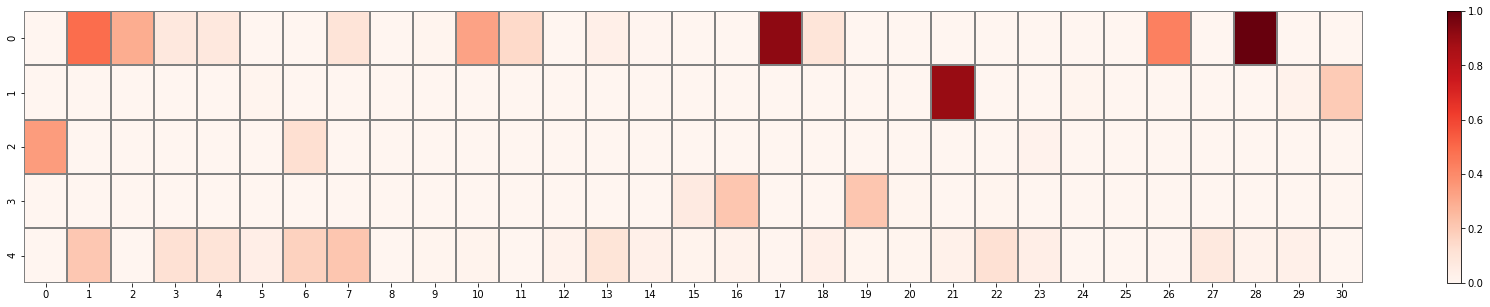

In [51]:
plt.figure(figsize=(30, 5))

h=sns.heatmap(df_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()


In [71]:
df_all=pd.read_table('./data/df.txt',sep=',',header=None)

In [72]:
df_all.max().max()

3.735

In [73]:
df_all_norm=df_all/df_all.max().max()

In [74]:
df_all_norm

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.000000,0.000535,0.002142,0.004552,0.003481,0.077376,0.055689,0.055154,...,0.442303,0.231058,0.004819,0.001071,0.486479,0.125569,0.002142,0.044980,0.000000,0.003481
1,0.0,0.0,0.000535,0.010442,0.000803,0.000000,0.083534,0.039893,0.219545,0.008032,...,0.417938,0.446319,0.008568,0.063989,0.018206,0.088621,0.022222,0.093976,0.003213,0.002142
2,0.0,0.0,0.000000,0.004016,0.000268,0.013922,0.000268,0.118876,0.000268,0.042838,...,0.037751,0.054083,0.004016,0.219813,0.359304,0.001606,0.043909,0.002142,0.000000,0.000535
3,0.0,0.0,0.000000,0.002142,0.000535,0.004819,0.002677,0.001071,0.019813,0.002410,...,0.062383,0.028648,0.149933,0.173762,0.002410,0.025167,0.025971,0.102276,0.000000,0.001339
4,0.0,0.0,0.000268,0.002677,0.006961,0.015797,0.003748,0.022222,0.004284,0.035341,...,0.010977,0.005890,0.242838,0.000000,0.484337,0.148862,0.058099,0.006426,0.001339,0.000000
5,0.0,0.0,0.000268,0.000000,0.000268,0.006426,0.006158,0.000268,0.004819,0.052744,...,0.135743,0.006426,0.000803,0.245783,0.006158,0.189290,0.004819,0.014458,0.000803,0.000000


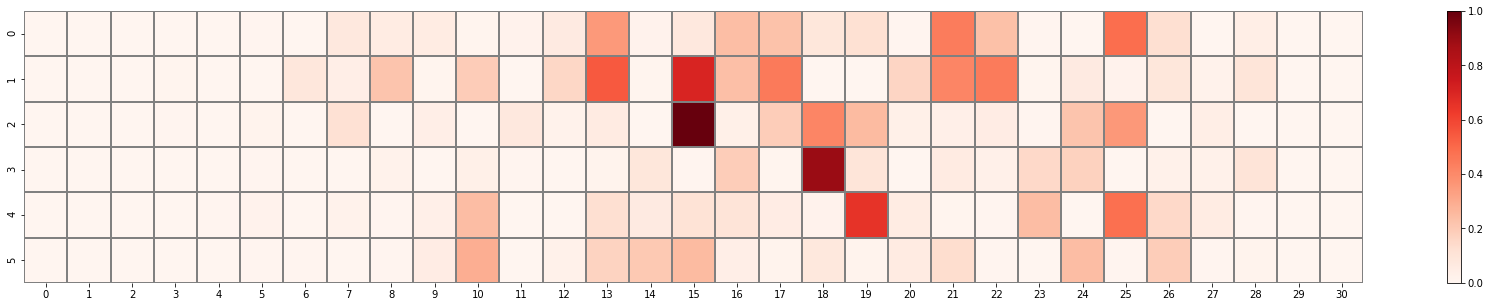

In [75]:
plt.figure(figsize=(30, 5))

h=sns.heatmap(df_all_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()


In [81]:
t_name, t= loader.predict_load('./data/target2.txt', 1)

In [82]:
d_name, d= loader.predict_load('./data/drug.txt', 80)

In [83]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Pretrained model loaded


In [84]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=80)

virtual screening...
in total: 78 drug-target pairs
encoding drug...
unique drugs: 77
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
+------+----------------------+-----------------+-------------+-------------+
| Rank |      Drug Name       |   Target Name   | Interaction | Probability |
+------+----------------------+-----------------+-------------+-------------+
|  1   |       Loviride       | Single-stranded |      NO     |     0.26    |
|  2   |     Chloroquine      | Single-stranded |      NO     |     0.17    |
|  3   |      Letermovir      | Single-stranded |      NO     |     0.17    |
|  4   |  Hydroxychloroquine  | Single-stranded |      NO     |     0.14    |
|  5   |      Indinavir       | Single-stranded |      NO     |     0.06    |
|  6   |      Amprenavir      | Single-stranded |      NO     |     0.02    |
|  7   |      Vicriviroc      | Single-stranded |      NO     |     0.01    |
|  8   |       Arbidol        | Single-stranded |   

In [ ]:
#drug visualization

In [6]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [16]:
smiles='CC(=O)OC1=CC=CC=C1C(=O)NC2=NC=C(S2)[N+](=O)[O-]'

In [17]:
m = Chem.MolFromSmiles(smiles)

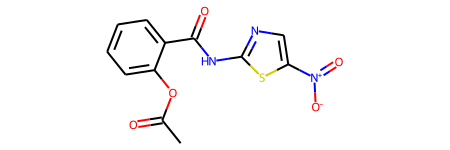

In [18]:
m

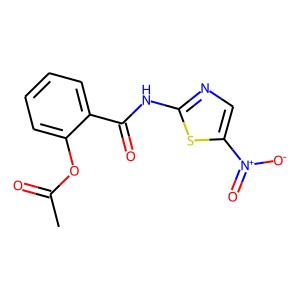

In [19]:
def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

SVG(moltosvg(m))

In [ ]:
#disney test

In [7]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Using backend: pytorch


Pretrained model loaded


In [14]:
t_name, t= loader.predict_load('./data/mir21_target.txt', 3)

In [15]:
d_name, d= loader.predict_load('./data/mir21_drug.txt', 3)

In [16]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=10)

virtual screening...
in total: 9 drug-target pairs
encoding drug...
unique drugs: 3
encoding protein...
unique target sequence: 3
Done.
predicting...
---------------
+------+-----------+-------------+-------------+-------------+
| Rank | Drug Name | Target Name | Interaction | Probability |
+------+-----------+-------------+-------------+-------------+
|  1   |     1     |  miR21_hx2  |     YES     |     0.80    |
|  2   |     1a    |  miR21_hx2  |     YES     |     0.80    |
|  3   |     2     |  miR21_hx2  |     YES     |     0.73    |
|  4   |     1     |   miR21_st  |      NO     |     0.24    |
|  5   |     1a    |   miR21_st  |      NO     |     0.21    |
|  6   |     2     |   miR21_st  |      NO     |     0.17    |
|  7   |     2     |  miR21_hx1  |      NO     |     0.00    |
|  8   |     1     |  miR21_hx1  |      NO     |     0.00    |
|  9   |     1a    |  miR21_hx1  |      NO     |     0.00    |
+------+-----------+-------------+-------------+-------------+

In [75]:
C1='COc1ccc(Br)cc1C(=O)Nc4ccc(c3nc2ccccc2[nH]3)cc4'

In [ ]:
C2

In [ ]:
C3

In [ ]:
C4

In [ ]:
C5

In [83]:
C5='CNc2nc(Nc1cccc(C(=O)O)c1)nc3ccccc23'

In [47]:
sm1='COC(=O)CCCOc5ccc(c4nc3ccc(c2ccc(N1CCN(C)CC1)cc2)cc3[nH]4)cc5'

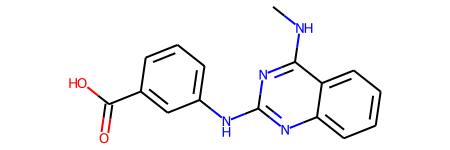

In [48]:
from rdkit import Chem
Chem.MolFromSmiles(C5)

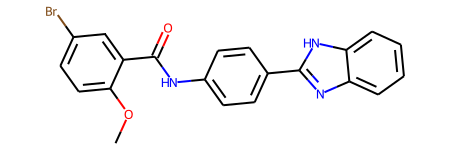

In [76]:
Chem.MolFromSmiles(C1)

In [20]:
#%%
%load_ext autoreload
%autoreload 2
import os
import datautils
from smoothgrad import *
from param import param_num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
X_drugs, X_targets, y = loader.file2var(input = './data/gra_test.txt')

This function is used to generate dataset from tabular file...
Completed!


In [22]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'CNN'

In [23]:
test = processor.encode(X_drugs, X_targets, y, drug_encoding, target_encoding, random_seed = 1)

Drug Target Interaction Prediction...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
Done.


In [24]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 5, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   gnn_hid_dim_drug = 64,
                   gnn_num_layers = 3,
                   gnn_activation = F.relu,
                   in_feats = 74
                  )

In [25]:
import dgl
param['batch_size']=1
def dgl_collate_func(x):
    d, p, y = zip(*x)
    d = dgl.batch(d)
    return d, torch.tensor(p), torch.tensor(y)

import torch
from torch.utils.data import SequentialSampler
from loader import *
params_test = {'batch_size': param['batch_size'],
               'shuffle': False,
               'num_workers': 0,
               'drop_last': False,
                'collate_fn': dgl_collate_func,
               'sampler': SequentialSampler(data_process_loader(test.index.values, test.Label.values, test, **param))}

test_loader = torch.utils.data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **param), **params_test)

In [26]:
import torch
device = torch.device("cuda")

In [27]:
model = models.CNN_GIN_AttrMasking(**param)

Pretrained model loaded


In [28]:
model_path = ("./CNN_GIN_drug_bal_model/model.pt")
filename = model_path.format("CNN_GIN")
print("Loading model: {}".format(filename))
model.load_state_dict(torch.load(filename, map_location='cuda'))
model = model.to(device)
#print(type(model))

Loading model: ./CNN_GIN_drug_bal_model/model.pt


In [29]:
from smoothgrad import *

batch_size=1

def compute_saliency(model, device, test_loader):

    model.eval()

    identity = "result"
    #saliency_dir = datautils.make_directory(".", "out/saliency")
    saliency_path = os.path.join("./out", identity+'.sal')

    # sgrad = SmoothGrad(model, device=device)
    sgrad = GuidedBackpropSmoothGrad(model, device=device)
    sal = ""
    #for batch_idx, (x0, y0) in enumerate(test_loader):
        #X, Y = x0.float().to(device), y0.to(device).float()
    #print(len(test))
    for batch_idx, (v_d, v_p, label) in enumerate(test_loader):
        X, Y, Z = v_d, v_p.float().to(device), label.to(device)
        #print(X.shape, Y.shape)
        #print(batch_idx)
        guided_saliency_p= sgrad.get_batch_gradients(X, Y, Z)
        # import pdb; pdb.set_trace()
        N, NS, _ = guided_saliency_p.shape # (N, 31, 1, 4)
        
        output = model(X, Y)
        prob = torch.sigmoid(output)
        p_np = prob.to(device='cpu').detach().numpy().squeeze()
        
        #print(N)
        str_sal=[] 
        for i in range(N):
            inr = batch_idx*batch_size + i
            str_sal = datautils.mat2str(np.squeeze(guided_saliency_p[i]))
            #print(p_np)
            #sal += "{}\t{:.6f}\t{}\n".format(inr, p_np, str_sal)
            str_sal
    return str_sal[:-1]
       
    #f = open(saliency_path,"w")
    #f.write(sal)
    #f.close()
    #print(saliency_path)

In [30]:
sal=compute_saliency(model, device, test_loader)

In [31]:
sal_list=sal.split(",")

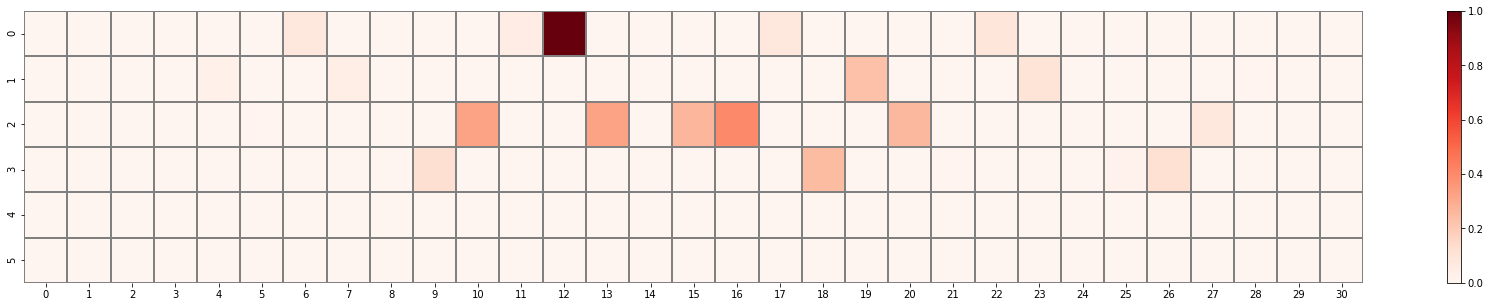

In [32]:
test['Target Sequence'][0]
seq_list=list(test['Target Sequence'][0])
seq = ','.join(seq_list)
with open('./data/df.txt', 'w+') as f:
    #f.write(str(seq) + '\n')
    for n in range(len(sal_list)//31):
        f.write(','.join(sal_list[n*31:(n+1)*31]) + '\n')
df=pd.read_table('./data/df.txt',sep=',',header=None)
df2=pd.read_table('./data/df2.txt',sep=',',header=None)
import pandas as pd
df3 = pd.Series(list('AAUCUCAUGGCAACACCAGUCGAUGGGCUGU'))
df4=(pd.get_dummies(df3)).T
df5=df4.rename(index={'A': '0','U': '1','C': '2','G': '3'})
df6=df5.sort_index()
merge = df6.append(df2, ignore_index=True)
df_final=df*merge
df_final
df_final.max().max()
df_norm=df_final/df_final.max().max()
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
plt.figure(figsize=(30, 5))
h=sns.heatmap(df_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()
